# ClusterAI 2019
## Clase 06 - clustering.
### Catedra de Ciencia de Datos, Ingeniería Industrial
### Universidad Tecnologica Nacional, Facultad Regional Buenos Aires

# Importamos Librerias

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Importamos librerias de PCA y silhouette_score
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score

In [3]:
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering

# Repositorio del Dataset:

https://archive.ics.uci.edu/ml/datasets/Wine

# Importamos Dataset

In [5]:
ls

2018/
clusterai_2019_clase06_clustering_credit.ipynb
clusterai_2019_clase06_clustering_wines.ipynb
clusterai_2019_clase06_dataset_credit.csv*
clusterai_2019_clase06_dataset_wines.csv
cluster_clase06_clustering_asignaciones.ipynb
cluster_clase06_properati_caba.csv


In [6]:
# definimos un vector con las columnas que queremos importar
names_col = ['G','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
             'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
             'OD280/OD315 of diluted wines','Proline']

# importamos el dataset
wine_df = pd.read_csv('clusterai_2019_clase06_dataset_wines.csv', delimiter=',', names=names_col)

In [12]:
wine_df.head()

,G,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# vemos que tamaño tiene el dataframe importado
wine_df.shape

(178, 14)

In [14]:
# revisamos que no existan valores null o NaNs en el dataframe
wine_df.isnull().sum()

G                               0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

#### Definimos nuestra matriz de datos X
Quitamos la primer columna ya que es el tipo de vino y ahora queremos hacer aprendizaje no-supervisado, es decir sin etiquetas. Queremos ver como se agrupan los datos con distintos algoritmos de clustering.

In [15]:
x = wine_df.iloc[:,1:]

In [16]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
x.shape

(178, 13)

# Auto-Scaling

In [18]:
# realizamos un autoscaling con los datos, para todas las features
scaler = preprocessing.StandardScaler().fit(x)

/home/human/Dropbox/doctorado/test/envs/keras_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [19]:
xscal = scaler.transform(x)

/home/human/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Ahora vamos a hacer un PCA con la matriz de datos Xscal con el fin de explorar la distribución de nuestros datos en una dimensión reducida.

In [21]:
# Generamos un PCA con los datos luego del autoscaling
import matplotlib.cm as cm
from sklearn import decomposition

n_comps = 7
components = range(1,n_comps + 1) # como range comienza en 0 le agregamos +1. El valor 7 componentes fue arbitrario.

# Usamos el objeto PCA de la libreria
pca = decomposition.PCA(n_components=n_comps)
# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# obtenemos los auto valores (eigenvalues) que representan cuanta varianza explica cada componente principal.
eigenvalues = pca.explained_variance_ratio_ # Porcentaje de la varianza explicada por cada PC
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

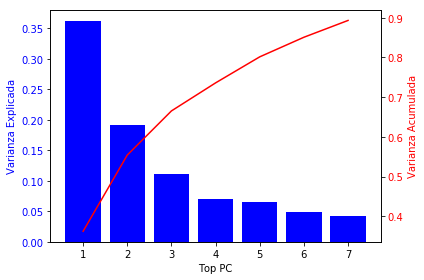

In [22]:
# visualizamos los autovalores

fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='red')  # we already handled the x-label with ax1
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

En el grafico de arriba observamos que con 7 componentes principales explicamos el 90% de la varianza, lo cual es muy bueno. Quiere decir que con 7 dimensiones podemos casi explicar el mismo problema que antes se explicaba con 13 dimensiones. Ahora visualizamos en 2D utilizando las dos primeras componentes principales.

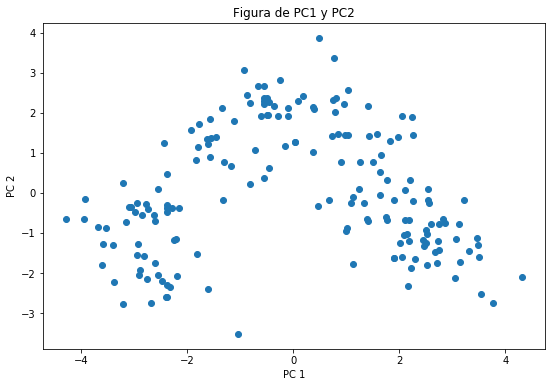

In [42]:
# scatter plot de los datos, solamente con 2 PC
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figura de PC1 y PC2')
plt.show()

## Clustering con K-MEANS

Vamos a entrenar un modelo de clustering de K-means con 3 clusters

In [23]:
# Generamos un modelo de K means con 3 clusters con los datos autoscalados
kmeans = KMeans(n_clusters=3, random_state=10).fit(xscal)

Obtenemos las labels/etiquetas del K-means. Es decir un vector de etiquetas para cada muestra donde cada etiqueta define a que cluster pertenece la muestra en cuestión.

In [24]:
# una vez realizado el clusering, observamos las labels de cluster asignadas a cada muestra
kmeans.labels_ = kmeans.labels_
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Visualizamos en pantalla los centroides, es una matriz de 3 por 13, es decir 3 centroides definidos por 13 dimensiones.

In [25]:
# visualizamos los centroides finales de cada cluster
centers = kmeans.cluster_centers_
centers

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

Si quisiéramos graficar los centroides en el PCA, lo que hacemos es agarrar el modelo PCA ya ajustado/fiteado mas arriba y transformamos los centroides a las nuevas dimensiones de PCA.

In [31]:
centers_kmeans_pca = pca.transform(centers)

Visualizamos en 2D con las dos componentes principales del PCA las muestras/samples y sus respectivos centroides.

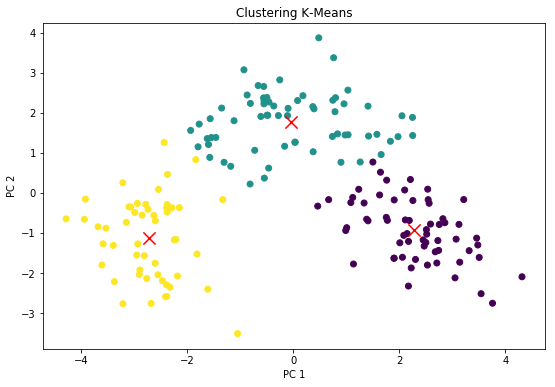

In [33]:
# Scatter plot con 2 PC: segun Cluster verdadero vs Clustering con K-Means

# K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=kmeans.labels_.astype(float))
plt.scatter(centers_kmeans_pca[:,0], centers_kmeans_pca[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-Means')
plt.show()

Ahora calculamos el Silhouette score para medir la calidad de nuestro algoritmo de clustering.

In [35]:
sill_score_kmeans = silhouette_score(xscal,kmeans.labels_)
print(sill_score_kmeans)

0.2848589191898987


### Reduccion de Dimensionalidad (RD) con PCA + K-Means

Ahora vamos dejar de usar las 13 variables/features originales para realizar clustering. En cambio vamos a usar las dos primeras features (decidido de manera arbitraria) obtenidas del PCA para realizar clustering sobre esas. 

Vamos a clusterizar con lo que nos puedan explicar UNICAMENTE los primeros 2 PC, y comparemos resultados.

In [36]:
# creamos un nuevo dataset utilizando de manera arbitraria las dos primeras componentes principales. 
# es decir que tendremos un dataset de solo 2 dimensiones.
reduced_dim = 2
xpca_rd = xpca[:,0:reduced_dim]

In [37]:
# Entrenamos el modelo K-means sobre el nuevo dataset obtenido desde las 2 primeras Comp. Princ. del PCA
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)

In [38]:
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [39]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[ 2.26614991, -0.86559213],
       [-0.16278513,  1.76758824],
       [-2.74392982, -1.2141906 ]])

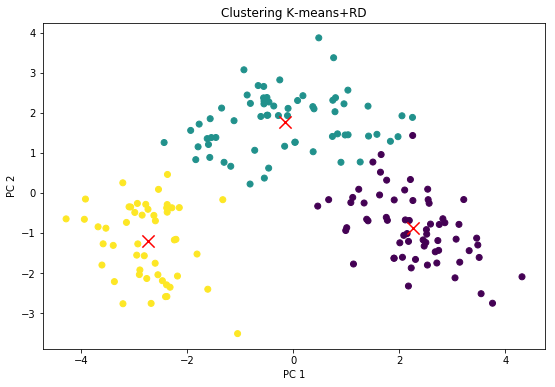

In [40]:
# Scatter plot con 2 PC: segun Cluster verdadero vs Clustering con K-Means+RD

# K-Means + RD
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

PREGUNTA:

*¿y aca que sucedió?*

In [41]:
sill_score_rd = silhouette_score(xpca_rd,kmeans_rd.labels_)
print(sill_score_rd)

0.5610505693103245


**Conclusión parcial**: realizando clustering con el full feature set original forzamos al algoritmo de K-means a aprender los clusters con mas dimensiones, es decir con mas complejidad. Aplicando el mismo algoritmo sobre las dos primeras componentes principales (55% de la varianza acumulada) del PCA (entrenado en datos originales) logramos un incremento del doble en el Silhouette Index. Esto quiere decir que el PCA nos permitio crear nuevas features/variables/dimensiones que terminaron siendo mas informativas que las originales a la hora de crear clusters.

## Consultas?

# Clustering Jerárquico (Hierarchical)

Con el comando linkage sobre los datos originales creamos un dendograma (linkage lo importamos de scipy) con el fin de visualizar los resultados.

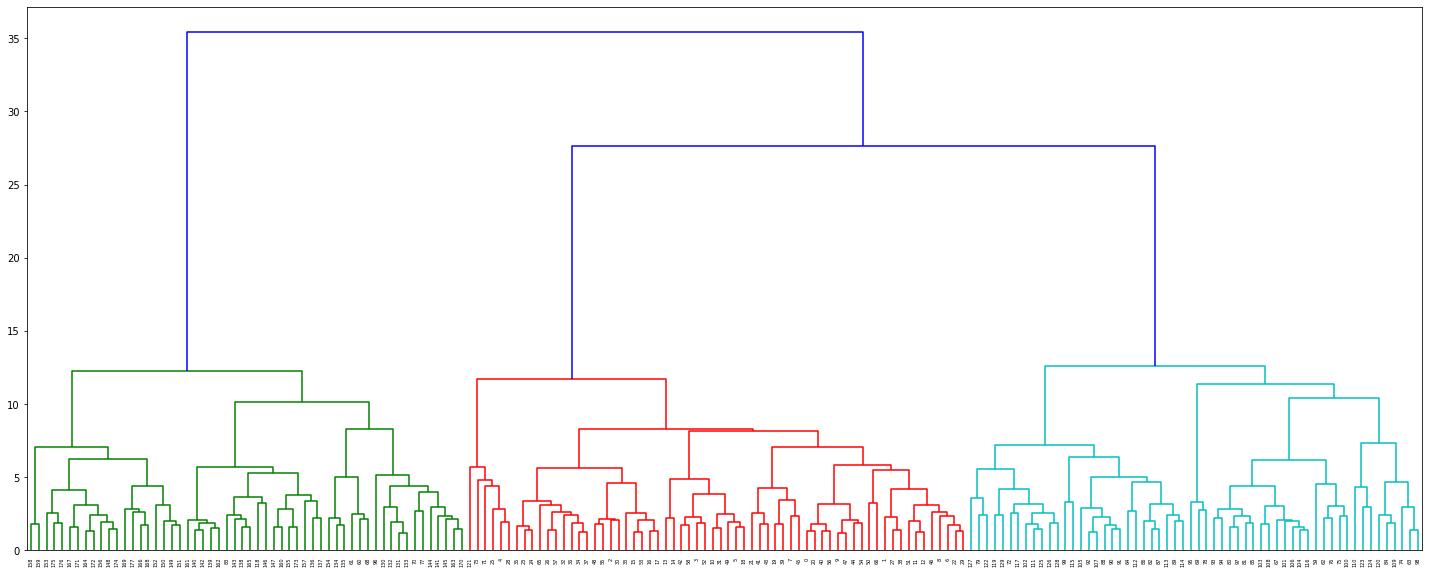

In [55]:
Z = linkage(xscal, 'ward')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

Ahora aplicamos AgglomerativeCLustering (que es el algoritmo de clustering jerarquico de scikit learn) sobre los datos y le pedimos 3 clusters.

In [48]:
hierar_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierar_cluster.fit_predict(xscal)
hierar_cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Visualizamos las etiquetas obtenidas del clustering jerarquico sobre las dos primeras componentes del PCA.

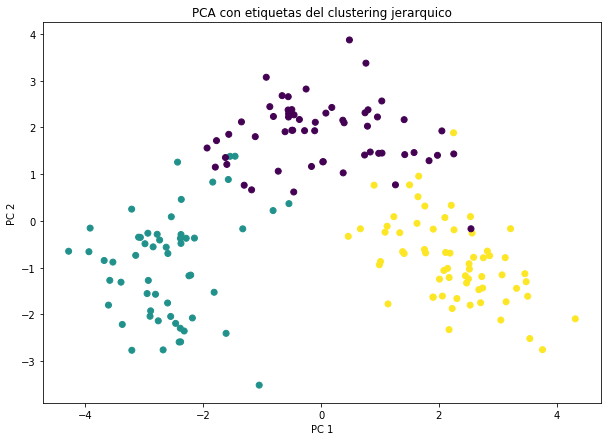

In [54]:
plt.figure(figsize=(10, 7))
plt.scatter(xpca[:,0], xpca[:,1], c=hierar_cluster.labels_,)
plt.title("PCA con etiquetas del clustering jerarquico")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

Ahora calculamos el Silhouette score sobre las etiquetas obtenidas del clustering jerarquico. Recordemos que el clustering jerarquico se realizo sobre los datos con las features originales.

In [52]:
sill_score_h = silhouette_score(xscal,cluster.labels_)
print(sill_score_h)

0.27744398269522647


### Asignacion
Aplicar clustering jerarquico utilizando las dos primeras componentes del PCA y comparar el resultado de silhouette score con el realizado con K-means.

In [55]:
### Codigo aqui ###
### Codigo aqui ###
### Codigo aqui ###
### Codigo aqui ###